### Key Details : 
1. Submission By : Balaji T. Thiruvenkatachari
2. Date : May 2021
3. Problem : Happy Customer Bank looking  to cross sell its credit cards to its existing customers.
4. Solution : Business Objective is to classify the list of customers (test set) who could be potential leads for Credit Cards. 

5. Notebook / Code : Code for EDA i.e. Exploratory Data Analysis

### Key Technical / Analytics outcomes: 
1. To build a Binary Classification Model using Training Dataset (existing list of leads vs. non-leads) 
2. To use the Classification model  for scoring Target list of Bank Customers(Test data). 

### Training DataSet - Features : 
1. ID   				Unique Identifier for a row
2. Gender  			    Gender of the Customer
3. Age 				    Age of the Customer (in Years)
4. Region_Code  		Code of the Region for the customers
5. Occupation  			Occupation Type for the customer
6. Channel_Code 		Acquisition Channel Code for the Customer  (Encoded)
7. Vintage 			    Vintage for the Customer (In Months) / Duration of relationship with Bank
8. Credit_Product  		If the Customer has any active credit product (Home loan, Personal loan, Credit Card etc.)
9. Avg_Account_Balance 	Average Account Balance for the Customer in last 12 Months
10. Is_Active 			If the Customer is Active in last 3 Months

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df_data = pd.read_csv("train_s3TEQDk.csv")

In [5]:
# Gender : Male      13419, Female    111528
# Lead : 1 - 58288, 187437

df_data["Is_Lead"].value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

In [28]:
df_data["Avg_Account_Balance"].describe()

count    2.457250e+05
mean     1.128403e+06
std      8.529364e+05
min      2.079000e+04
25%      6.043100e+05
50%      8.946010e+05
75%      1.366666e+06
max      1.035201e+07
Name: Avg_Account_Balance, dtype: float64

<AxesSubplot:ylabel='Frequency'>

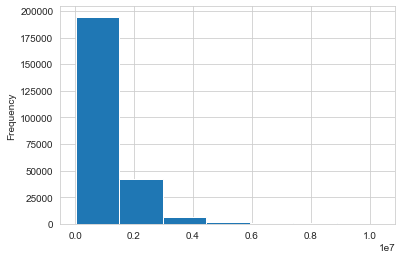

In [32]:
# Usual Average Account balance is a good indicator of customer attributes in Banking scenario. 
# However, Average Account Balance is a numeric value. So we convert this into Categorical (Use concept of Binning).

# Analysing the Histogram gives us a good indication of data distribution. So we can go for 5 to 7 bins
sns.set_style('whitegrid')
df_data['Avg_Account_Balance'].plot(kind='hist', bins=7)

In [37]:
# Usually Average Account balance is a good indicator of customer attributes in Banking scenario. 
# However, Average Account Balance is a numeric value. So we convert this into Categorical (Use concept of Binning).

bin_labels_5 = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond'] #Labels are data driven at this point - purely value based.
df_data['Avg_Account_Balance'] = pd.qcut(df_data['Avg_Account_Balance'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)

<AxesSubplot:ylabel='Frequency'>

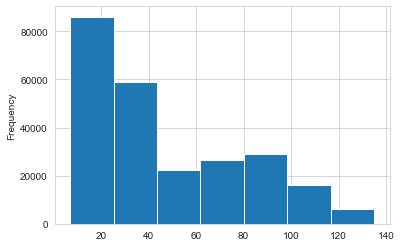

In [38]:
sns.set_style('whitegrid')
df_data['Vintage'].plot(kind='hist', bins=7)

In [39]:
# Similarly length of relationship with Bank is a good indicator of customer attributes in Banking scenario. 
# However, Vintage is a numeric value. So we convert this into Categorical (Use concept of Binning).
bin_labels_5 = ['LessThan_20Months', '20To40_Months', '40To60_Months', '60To80_Months', '80OrMore_Months'] #Labels are data driven at this point - purely value based.
df_data['Vintage_Quantile'] = pd.qcut(df_data['Vintage'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)

<AxesSubplot:ylabel='Frequency'>

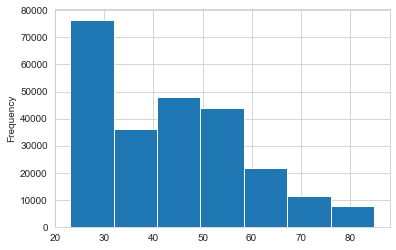

In [41]:
sns.set_style('whitegrid')
df_data['Age'].plot(kind='hist', bins=7)

In [42]:
# Similarly Age of a Customer could be a good indicator of response to certain product promotions in Banking scenario (digital etc.)
# However, Age is a numeric value. So we convert this into Categorical (Use concept of Binning).
bin_labels_5 = ['LessThan_30Years', '30To40_Years', '40To50_Years', '50To60_Years', '60OrMore_Years'] #Labels are data driven at this point - purely value based.
df_data['Age_Quantile'] = pd.qcut(df_data['Age'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)

In [43]:
df_data

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,AAB_Quantile,Vintage_Quantile,Age_Quantile
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0,Gold,40To60_Months,60OrMore_Years
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0,Silver,40To60_Months,30To40_Years
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0,Platinum,20To40_Months,50To60_Years
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0,Bronze,LessThan_20Months,30To40_Years
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0,Gold,40To60_Months,30To40_Years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0,Diamond,80OrMore_Months,50To60_Years
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0,Gold,LessThan_20Months,LessThan_30Years
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0,Silver,LessThan_20Months,LessThan_30Years
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0,Bronze,40To60_Months,LessThan_30Years


In [8]:
# The average age of customers are potential leads is higher
# Vintage of customers who are potential leads is higher - that is expected - longer the operations better potential / desirability
# Average Balance of customers who are potential leads is higher - that is expected
df_data.groupby("Is_Lead").mean() 

,Age,Vintage,Avg_Account_Balance
Is_Lead,,,
0,41.947662,41.913923,1.103018e+06
1,49.993944,63.183074,1.210034e+06


### Categorical Data
1. Which are the categorical data attributes in this set ?
2. Most models expect numeric values. Few like DecisionTree are but most of algorithms expect numeric elements. So Can you encode categorical values as Numerics ? 

In [6]:
pd.crosstab(df_data['Gender'], df_data['Is_Lead']) # 35583/58288 = 61% males are leads

Is_Lead,0,1
Gender,,
Female,88823,22705
Male,98614,35583


In [9]:
# Categorical Analysis - Gender
df_data.groupby("Gender").mean()  

,Age,Vintage,Avg_Account_Balance,Is_Lead
Gender,,,,
Female,41.382639,41.764257,1.107373e+06,0.203581
Male,45.912114,51.276489,1.145881e+06,0.265155


In [30]:
pd.crosstab(df_data['Occupation'], df_data['Is_Lead']) # 27841/58288 = 48% Self_Employed are leads

Is_Lead,0,1
Occupation,,
Entrepreneur,905,1762
Other,52984,17189
Salaried,60503,11496
Self_Employed,73045,27841


In [11]:
df_data.groupby("Occupation").mean() # Enterpreneurs are better potential as Lead...

,Age,Vintage,Avg_Account_Balance,Is_Lead
Occupation,,,,
Entrepreneur,47.833521,69.664792,1.415043e+06,0.660667
Other,53.116797,54.924729,1.209870e+06,0.244952
Salaried,30.882901,26.348838,1.033420e+06,0.159669
Self_Employed,46.568563,55.527189,1.131946e+06,0.275965


In [59]:
pd.crosstab(df_data['Credit_Product'], df_data['Is_Lead']) # Credit_Product 22690/33313  
# 66% have no Credit Product / 33% have yes as value

Is_Lead,0,1
Credit_Product,,
No,133734,10623
Yes,49353,22690


In [37]:
pd.crosstab(df_data['Is_Active'], df_data['Is_Lead']) # Credit_Product 22690/33313  

Is_Lead,0,1
Is_Active,,
No,119007,31283
Yes,68430,27005


<AxesSubplot:xlabel='Is_Active', ylabel='count'>

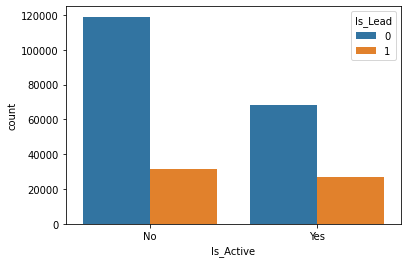

In [38]:
sns.countplot(x='Is_Active',hue='Is_Lead', data=df_data)

# 13% of leads not active and 11% are  active

### Visual Analysis

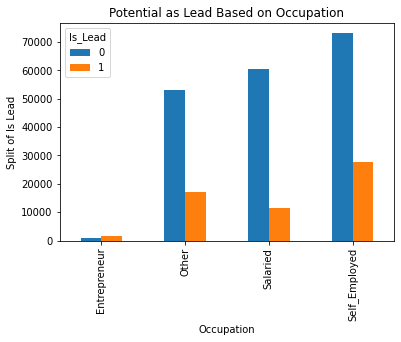

In [13]:
%matplotlib inline
pd.crosstab(df_data.Occupation,df_data.Is_Lead).plot(kind='bar')
plt.title('Potential as Lead Based on Occupation')
plt.xlabel('Occupation')
plt.ylabel('Split of Is Lead')
plt.savefig('figOccupationLead')

#Enterpreneurs seem to be better responding to credit card offers in relative terms

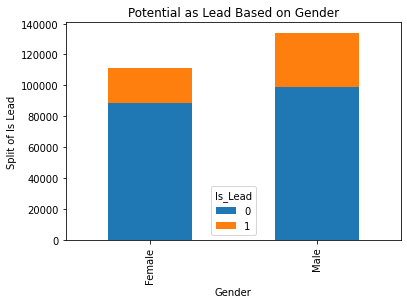

In [15]:
%matplotlib inline
pd.crosstab(df_data.Gender,df_data.Is_Lead).plot(kind='bar', stacked=True)
plt.title('Potential as Lead Based on Gender')
plt.xlabel('Gender')
plt.ylabel('Split of Is Lead')
plt.savefig('figGenderLead')

#Based on Gender the response to Credit Card offers seems to be near neutral or no particular difference

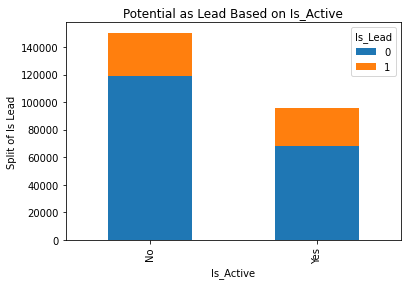

In [20]:
%matplotlib inline
pd.crosstab(df_data.Is_Active,df_data.Is_Lead).plot(kind='bar',stacked=True)
plt.title('Potential as Lead Based on Is_Active')
plt.xlabel('Is_Active')
plt.ylabel('Split of Is Lead')
plt.savefig('figIsActiveLead')

#Based on Is_Active, the response to Credit Card offers seems to be near neutral or no particular difference

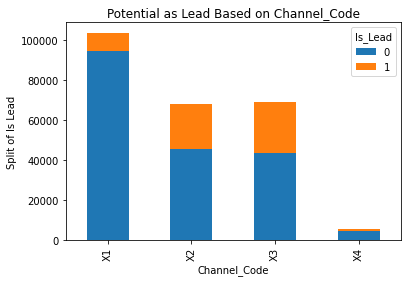

In [22]:
%matplotlib inline
pd.crosstab(df_data.Channel_Code,df_data.Is_Lead).plot(kind='bar',stacked=True)
plt.title('Potential as Lead Based on Channel_Code')
plt.xlabel('Channel_Code')
plt.ylabel('Split of Is Lead')
plt.savefig('figChannelLead')

#Channels X2 and X3 seems to be better channels for presenting Credit Card offers to potential leads

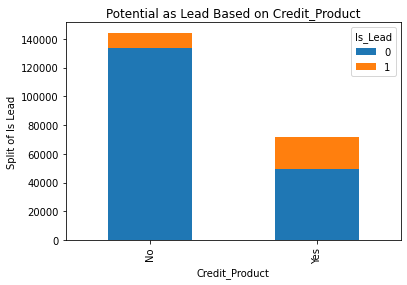

In [18]:
%matplotlib inline
pd.crosstab(df_data.Credit_Product,df_data.Is_Lead).plot(kind='bar',stacked=True)
plt.title('Potential as Lead Based on Credit_Product')
plt.xlabel('Credit_Product')
plt.ylabel('Split of Is Lead')
plt.savefig('figCreditProductLead')

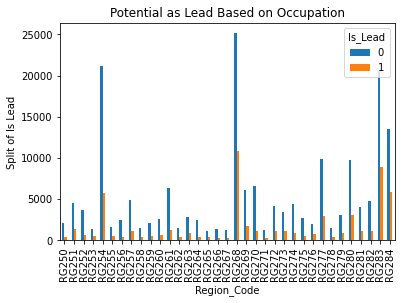

In [19]:
%matplotlib inline
pd.crosstab(df_data.Region_Code,df_data.Is_Lead).plot(kind='bar')
plt.title('Potential as Lead Based on Occupation')
plt.xlabel('Region_Code')
plt.ylabel('Split of Is Lead')
plt.savefig('figRegionCodeLead') 

#Few Regions have higher potential of leads